<a href="https://colab.research.google.com/github/DanechkaSmirnov/lagrange_interpolation/blob/main/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import sin, cos, pi
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return cos(x)/sin(x)+x*x


def get_nonopt_points(n, a, b):
    points = []
    for i in range(0, n+1):
        point = a+(b-a)/n*i
        points.append(point)
    answ = [[x, f(x)] for x in points]
    return answ

def get_opt_points(n, a, b):
    points = []
    for i in range(0, n+1):
        point = 1/2*((b-a)*cos((2*i+1)/(2*n+2)*pi)+(b+a))
        points.append(point)
    answ = [[x, f(x)] for x in points]
    return answ[::-1]

def gauss(A):
    n = len(A)

    for i in range(0, n):
        maxEl = abs(A[i][i])
        maxRow = i
        for k in range(i + 1, n):
            if abs(A[k][i]) > maxEl:
                maxEl = abs(A[k][i])
                maxRow = k

        for k in range(i, n + 1):
            tmp = A[maxRow][k]
            A[maxRow][k] = A[i][k]
            A[i][k] = tmp

        for k in range(i + 1, n):
            c = -A[k][i] / A[i][i]
            for j in range(i, n + 1):
                if i == j:
                    A[k][j] = 0
                else:
                    A[k][j] += c * A[i][j]

    x = [0 for i in range(n)]
    for i in range(n - 1, -1, -1):
        x[i] = A[i][n] / A[i][i]
        for k in range(i - 1, -1, -1):
            A[k][n] -= A[k][i] * x[i]
    return x


def spline_1_0(n, a, b, x, optimal = False):
    if not optimal:
        points = get_nonopt_points(n, a, b)
    else:
        points = get_opt_points(n, a, b)
    i = 0
    if x > points[-1][0]:
        return points[-1][1]
    while points[i][0] < x:
        i+=1
    if points[i][0] == x:
        return points[i][1]
    else:
        x_1 = points[i-1][0]
        x_2 = points[i][0]
        y_1 = points[i-1][1]
        y_2 = points[i][1]
        return ((x-x_1)/(x_2-x_1))*(y_2-y_1)+y_1
    
def spline_2_1(n, a, b, x, optimal = False):
    if not optimal:
        points = get_nonopt_points(n, a, b)
    else:
        points = get_opt_points(n, a, b)
    i = 0
    if x > points[-1][0]:
        return points[-1][1]
    while points[i][0] < x:
        i+=1
    if points[i][0] == x:
        return points[i][1]
    elif i == 1:
        x_1 = points[0][0]
        x_2 = points[1][0]
        x_3 = points[2][0]
        y_1 = points[0][1]
        y_2 = points[1][1]
        y_3 = points[2][1]
    elif i == n:
        x_1 = points[n-2][0]
        x_2 = points[n-1][0]
        x_3 = points[n][0]
        y_1 = points[n-2][1]
        y_2 = points[n-1][1]
        y_3 = points[n][1]
    else:
        x_1 = points[i-1][0]
        x_2 = points[i][0]
        x_3 = points[i+1][0]
        y_1 = points[i-1][1]
        y_2 = points[i][1]
        y_3 = points[i+1][1]
        
    X = np.array([[x_1**2, x_1, 1, 0, 0, 0],
                  [x_2**2, x_2, 1, 0, 0, 0],
                  [2*x_2, 1, 0, -2*x_2, -1, 0],
                  [0, 0, 0, x_2**2, x_2, 1],
                  [0, 0, 0, x_3**2, x_3, 1],
                  [0, 0, 0, 2*x_3, 1, 0]])
    y = np.array([y_1, y_2, 0, y_2, y_3, 0])
    matrix = np.c_[X, y.T]
    a_12, a_11, a_10, a_22, a_21, a_20 = gauss(matrix)
    if i == n:
        return (a_22*x**2+a_21*x+a_20)
    else:
        return (a_12*x**2+a_11*x+a_10)
    
def spline_3_2(n, a, b, x, optimal=False):
    if not optimal:
        points = get_nonopt_points(n, a, b)
    else:
        points = get_opt_points(n, a, b)
    i = 0
    if x > points[-1][0]:
        return points[-1][1]
    while points[i][0] < x:
        i+=1
    if points[i][0] == x:
        return points[i][1]
    elif i == 1:
        x_1 = points[0][0]
        x_2 = points[1][0]
        x_3 = points[2][0]
        x_4 = points[3][0]
        y_1 = points[0][1]
        y_2 = points[1][1]
        y_3 = points[2][1]
        y_4 = points[3][1]
    elif i in [n, n-1]:
        x_1 = points[n-4][0]
        x_2 = points[n-3][0]
        x_3 = points[n-2][0]
        x_4 = points[n-1][0]
        y_1 = points[n-4][1]
        y_2 = points[n-3][1]
        y_3 = points[n-2][1]
        y_4 = points[n-1][1]
    else:
        x_1 = points[i-1][0]
        x_2 = points[i][0]
        x_3 = points[i+1][0]
        x_4 = points[i+2][0]
        y_1 = points[i-1][1]
        y_2 = points[i][1]
        y_3 = points[i+1][1]
        y_4 = points[i+2][1]
    h_1, h_2, h_3 = x_2-x_1, x_3-x_2, x_4-x_3
    H = [[2*(h_1+h_2), h_2],
         [h_2, 2*(h_2+h_3)]]
    gamma = np.array([6*((y_3-y_2)/h_2 - (y_2-y_1)/h_1), 6*((y_4-y_3)/h_3 - (y_3-y_2)/h_2)])
    matrix = np.c_[H, gamma.T]
    ddy_1, ddy_2 = gauss(matrix)
    dy_1 = (y_2-y_1)/h_1 - ddy_2*h_1/6-ddy_1*h_1/3
    answ = y_1+dy_1*(x-x_1)+ddy_1*(x-x_1)**2/2+(ddy_2-ddy_1)*(x-x_1)**3/(6*h_1)
    return answ
    
    
    

def basis(points, k, x):
    coef = 1
    prod = 1
    for i in range(len(points)):
        if i != k:
            coef *= points[k][0]-points[i][0]
            prod *= x - points[i][0]
    return prod/coef

def lagrange(n, a, b, x, optimal = False):
    if not optimal:
        points = get_nonopt_points(n, a, b)
    else:
        points = get_opt_points(n, a, b)
    point = 0
    for i in range(n):
        point+= points[i][1]*basis(points, i, x)
    return point


    
def divided_difference(points_raw, k):
    answ = 0
    points = points_raw[:k+1]
    for i in range(len(points)):
        mult = 1
        for j in range(len(points)):
            if i != j:
                mult *= points[i][0] - points[j][0]
        answ+=points[i][1]/mult if mult is not None else points[i][1]
    return answ

def newton(n, a, b, x, optimal = False):
    if not optimal:
        points = get_nonopt_points(n, a, b)
    else:
        points = get_opt_points(n, a, b)
    answ = 0
    for i in range(n):
        mult = 1
        for point in points[:i]:
            mult *= x-point[0]
        answ+=divided_difference(points, i)*mult
    return answ

def compare(n, a, b, func1, func2, ratio, optimal=False):
    errors = []
    for i in range(4, n):
        step_errors = [max_error(i, a, b, func1, ratio, optimal),
                       max_error(i, a, b, func2, ratio, optimal)]
        errors.append(step_errors)
    type_of_points = 'optimal' if optimal else 'suboptimal'
    fig, ax = plt.subplots()
    ax.set_title(f'{func1} compared with {func2} with {type_of_points} points', fontsize = 20)
    ax.plot(range(4, n), [x[0] for x in errors], 'tab:blue', label = f'{func1}')
    ax.plot(range(4, n), [x[1] for x in errors], 'tab:red', label = f'{func2}')
    ax.legend(prop = {'size': 20})
    fig.set_size_inches(18.5, 10.5, forward=True)

        
def table_of_errors(n, a, b, func, ratio):
    print(f'Error table for {func} method')
    for i in range(4, n):
        nonopt_error = max_error(i, a, b, func, ratio, False)
        opt_error = max_error(i, a, b, func, ratio, True)
        print(f'n: {i}, k: {i*ratio}, R_n: {nonopt_error}, Ropt_n: {opt_error}')

def max_error(n, a, b, func, ratio, optimal=False):
    points = np.linspace(a, b, n*ratio)[:-10]
    maximum = 0
    point = 0
    if func == 'Lagrange':
        for x in points:
            err = abs(f(x) - lagrange(n, a, b, x, optimal))
            if err > maximum:
                maximum = err
                point = x
    elif func == 'Newton':
        for x in points:
            err = abs(f(x) - newton(n, a, b, x, optimal))
            if err > maximum:
                maximum = err
                point = x
    elif func == 'Spline_1_0':
        for x in points:
            err = abs(f(x) - spline_1_0(n, a, b, x, optimal))
            if err > maximum:
                maximum = err
                point = x
    elif func == 'Spline_2_1':
        for x in points:
            err = abs(f(x) - spline_2_1(n, a, b, x, optimal))
            if err > maximum:
                maximum = err
                point = x
    elif func == 'Spline_3_2':
        for x in points:
            err = abs(f(x) - spline_3_2(n, a, b, x, optimal))
            if err > maximum:
                maximum = err
                point = x
                
    return round(maximum, 8)

def show_subplot(a, b, func, optimal = False):
    if not optimal:
        if func == 'Newton':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([newton(3, a, b, x) for x in x])
            y_10 = np.array([newton(10, a, b, x) for x in x])
            y_25 = np.array([newton(25, a, b, x) for x in x])
            y_35 = np.array([newton(35, a, b, x) for x in x])
            y_50 = np.array([newton(50, a, b, x) for x in x])
        if func == 'Lagrange':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([lagrange(3, a, b, x) for x in x])
            y_10 = np.array([lagrange(10, a, b, x) for x in x])
            y_25 = np.array([lagrange(25, a, b, x) for x in x])
            y_35 = np.array([lagrange(35, a, b, x) for x in x])
            y_50 = np.array([lagrange(50, a, b, x) for x in x])
        if func == 'Spline_1_0':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_1_0(3, a, b, x) for x in x])
            y_10 = np.array([spline_1_0(10, a, b, x) for x in x])
            y_25 = np.array([spline_1_0(25, a, b, x) for x in x])
            y_35 = np.array([spline_1_0(35, a, b, x) for x in x])
            y_50 = np.array([spline_1_0(50, a, b, x) for x in x])
        if func == 'Spline_2_1':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_2_1(3, a, b, x) for x in x])
            y_10 = np.array([spline_2_1(10, a, b, x) for x in x])
            y_25 = np.array([spline_2_1(25, a, b, x) for x in x])
            y_35 = np.array([spline_2_1(35, a, b, x) for x in x])
            y_50 = np.array([spline_2_1(50, a, b, x) for x in x])
        if func == 'Spline_3_2':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_3_2(3, a, b, x) for x in x])
            y_10 = np.array([spline_3_2(10, a, b, x) for x in x])
            y_25 = np.array([spline_3_2(25, a, b, x) for x in x])
            y_35 = np.array([spline_3_2(35, a, b, x) for x in x])
            y_50 = np.array([spline_3_2(50, a, b, x) for x in x])
    else:
        if func == 'Newton':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([newton(3, a, b, x, True) for x in x])
            y_10 = np.array([newton(10, a, b, x, True) for x in x])
            y_25 = np.array([newton(25, a, b, x, True) for x in x])
            y_35 = np.array([newton(35, a, b, x, True) for x in x])
            y_50 = np.array([newton(50, a, b, x, True) for x in x])
        if func == 'Lagrange':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([lagrange(3, a, b, x, True) for x in x])
            y_10 = np.array([lagrange(10, a, b, x, True) for x in x])
            y_25 = np.array([lagrange(25, a, b, x, True) for x in x])
            y_35 = np.array([lagrange(35, a, b, x, True) for x in x])
            y_50 = np.array([lagrange(50, a, b, x, True) for x in x])
        if func == 'Spline_1_0':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_1_0(3, a, b, x, True) for x in x])
            y_10 = np.array([spline_1_0(10, a, b, x, True) for x in x])
            y_25 = np.array([spline_1_0(25, a, b, x, True) for x in x])
            y_35 = np.array([spline_1_0(35, a, b, x, True) for x in x])
            y_50 = np.array([spline_1_0(50, a, b, x, True) for x in x])
        if func == 'Spline_2_1':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_2_1(3, a, b, x, True) for x in x])
            y_10 = np.array([spline_2_1(10, a, b, x, True) for x in x])
            y_25 = np.array([spline_2_1(25, a, b, x, True) for x in x])
            y_35 = np.array([spline_2_1(35, a, b, x, True) for x in x])
            y_50 = np.array([spline_2_1(50, a, b, x, True) for x in x])
        if func == 'Spline_3_2':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_3_2(3, a, b, x, True) for x in x])
            y_10 = np.array([spline_3_2(10, a, b, x, True) for x in x])
            y_25 = np.array([spline_3_2(25, a, b, x, True) for x in x])
            y_35 = np.array([spline_3_2(35, a, b, x, True) for x in x])
            y_50 = np.array([spline_3_2(50, a, b, x, True) for x in x])
    fig, axs = plt.subplots(2, 3)
    type_of_points = 'opt' if optimal else 'non_opt'
    axs[0, 0].plot(x, y)
    axs[0, 0].set_title('f(x)')
    axs[0, 1].plot(x, y_3, 'tab:orange')
    axs[0, 1].set_title(f'{func} n=3, {type_of_points}')
    axs[0, 2].plot(x, y_10, 'tab:orange')
    axs[0, 2].set_title(f'{func} n=10, {type_of_points}')
    axs[1, 0].plot(x, y_25, 'tab:orange')
    axs[1, 0].set_title(f'{func} n=25, {type_of_points}')
    axs[1, 1].plot(x, y_35, 'tab:orange')
    axs[1, 1].set_title(f'{func} n=35, {type_of_points}')
    axs[1, 2].plot(x, y_50, 'tab:orange')
    axs[1, 2].set_title(f'{func} n=50, {type_of_points}')
    fig.set_size_inches(18.5, 10.5, forward=True)
    
def show_superposition(a, b, func, optimal=False):
    if not optimal:
        if func == 'Newton':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([newton(3, a, b, x) for x in x])
            y_10 = np.array([newton(10, a, b, x) for x in x])
            y_25 = np.array([newton(25, a, b, x) for x in x])
            y_35 = np.array([newton(35, a, b, x) for x in x])
            y_50 = np.array([newton(50, a, b, x) for x in x])
        if func == 'Lagrange':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([lagrange(3, a, b, x) for x in x])
            y_10 = np.array([lagrange(10, a, b, x) for x in x])
            y_25 = np.array([lagrange(25, a, b, x) for x in x])
            y_35 = np.array([lagrange(35, a, b, x) for x in x])
            y_50 = np.array([lagrange(50, a, b, x) for x in x])
        if func == 'Spline_1_0':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_1_0(3, a, b, x) for x in x])
            y_10 = np.array([spline_1_0(10, a, b, x) for x in x])
            y_25 = np.array([spline_1_0(25, a, b, x) for x in x])
            y_35 = np.array([spline_1_0(35, a, b, x) for x in x])
            y_50 = np.array([spline_1_0(50, a, b, x) for x in x])
        if func == 'Spline_2_1':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_2_1(3, a, b, x) for x in x])
            y_10 = np.array([spline_2_1(10, a, b, x) for x in x])
            y_25 = np.array([spline_2_1(25, a, b, x) for x in x])
            y_35 = np.array([spline_2_1(35, a, b, x) for x in x])
            y_50 = np.array([spline_2_1(50, a, b, x) for x in x])
        if func == 'Spline_3_2':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_3_2(3, a, b, x) for x in x])
            y_10 = np.array([spline_3_2(10, a, b, x) for x in x])
            y_25 = np.array([spline_3_2(25, a, b, x) for x in x])
            y_35 = np.array([spline_3_2(35, a, b, x) for x in x])
            y_50 = np.array([spline_3_2(50, a, b, x) for x in x])
    else:
        if func == 'Newton':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([newton(3, a, b, x, True) for x in x])
            y_10 = np.array([newton(10, a, b, x, True) for x in x])
            y_25 = np.array([newton(25, a, b, x, True) for x in x])
            y_35 = np.array([newton(35, a, b, x, True) for x in x])
            y_50 = np.array([newton(50, a, b, x, True) for x in x])
        if func == 'Lagrange':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([lagrange(3, a, b, x, True) for x in x])
            y_10 = np.array([lagrange(10, a, b, x, True) for x in x])
            y_25 = np.array([lagrange(25, a, b, x, True) for x in x])
            y_35 = np.array([lagrange(35, a, b, x, True) for x in x])
            y_50 = np.array([lagrange(50, a, b, x, True) for x in x])
        if func == 'Spline_1_0':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_1_0(3, a, b, x, True) for x in x])
            y_10 = np.array([spline_1_0(10, a, b, x, True) for x in x])
            y_25 = np.array([spline_1_0(25, a, b, x, True) for x in x])
            y_35 = np.array([spline_1_0(35, a, b, x, True) for x in x])
            y_50 = np.array([spline_1_0(50, a, b, x, True) for x in x])
        if func == 'Spline_2_1':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_2_1(3, a, b, x, True) for x in x])
            y_10 = np.array([spline_2_1(10, a, b, x, True) for x in x])
            y_25 = np.array([spline_2_1(25, a, b, x, True) for x in x])
            y_35 = np.array([spline_2_1(35, a, b, x, True) for x in x])
            y_50 = np.array([spline_2_1(50, a, b, x, True) for x in x])
        if func == 'Spline_3_2':
            x = np.linspace(a, b, 100)
            y = np.array([f(y) for y in x])
            y_3 = np.array([spline_3_2(3, a, b, x, True) for x in x])
            y_10 = np.array([spline_3_2(10, a, b, x, True) for x in x])
            y_25 = np.array([spline_3_2(25, a, b, x, True) for x in x])
            y_35 = np.array([spline_3_2(35, a, b, x, True) for x in x])
            y_50 = np.array([spline_3_2(50, a, b, x, True) for x in x])

    type_of_points = 'optimal' if optimal else 'suboptimal'
    fig, ax = plt.subplots()
    ax.set_title(f'{func} method with {type_of_points} points', fontsize = 20)
    ax.plot(x, y_3, 'tab:blue', label = 'n = 3')
    ax.plot(x, y_10, 'tab:green', label = 'n = 10')
    ax.plot(x, y_25, 'tab:cyan', label = 'n = 25')
    ax.plot(x, y_35, 'tab:purple', label = 'n = 35')
    ax.plot(x, y_50, 'tab:red', label = 'n = 50')
    ax.plot(x, y, 'tab:orange', label = 'f(x)', linewidth = 2)
    plt.xlim([0, 4])
    plt.ylim([0, 6])
    ax.legend(prop = {'size': 20})
    fig.set_size_inches(18.5, 10.5, forward=True)

    

In [ ]:
# -----------------------------------------------------------
# В данной программе реализованы следующие методы интерполяции:
# 1) Метод Лагранжа - Lagrange
# 2) Метод Ньютона - Newton
# 3) Линейные сплайны - Spline_1_0
# 4) Квадратичные сплайны - Spline_2_1
# 5) Кубические сплайны - Spline_3_2
# 
# Используемая функция: ctg(x)+x^2
# 
# Для проверки работы методов интерполяции могут быть использованы следующие функции:
#
# show_subplot(a, b, func, optimal) - построение 6 графиков: f(x) и интерполяция 
# при 3, 10, 25, 35 и 50 узлах
#
# show_superposition(a, b, func, optimal) - построение 1 графика, на котором находятся
# графики f(x) и интерполяция при 3, 10, 25, 35 и 50 узлах
#
# table_of_errors(n, a, b, func, ratio) - выводится таблица максимальных отклонений
# интерполяционного полинома при количестве узлов от 4 до n-1
#
# compare(n, a, b, func1, func2, ratio, optimal) - выводится график максимальных отклонений
# двух выбранных методов при количестве узлов от 4 до n-1
#
#
# a, b - границы интервала непрерывности из области определения нашей функции
#
# func - название метода интерполирования
#
# optimal - булево значение, от которого зависит способ выбора точек
#
# ratio - целое число, от которого зависит количество точек разбиения интервала интерполирования
# для определения отклонения полинома от функции (m = n*ratio)
#
# n - целое число, от него будет зависеть число узлов, по которым будет строиться интерполяция (от 4 до n-1)
# 
# Рекомендованные границы для заданной функции: a = 0.5, b = 3
# -----------------------------------------------------------

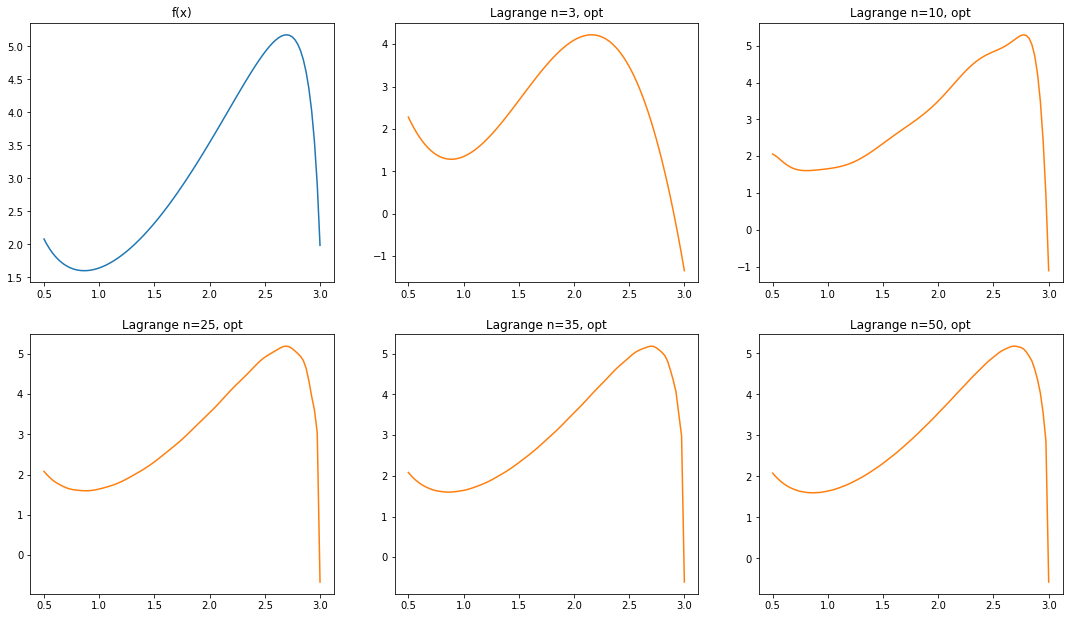

In [3]:
a = 0.5
b = 3
show_subplot(a, b, 'Lagrange', optimal=True)

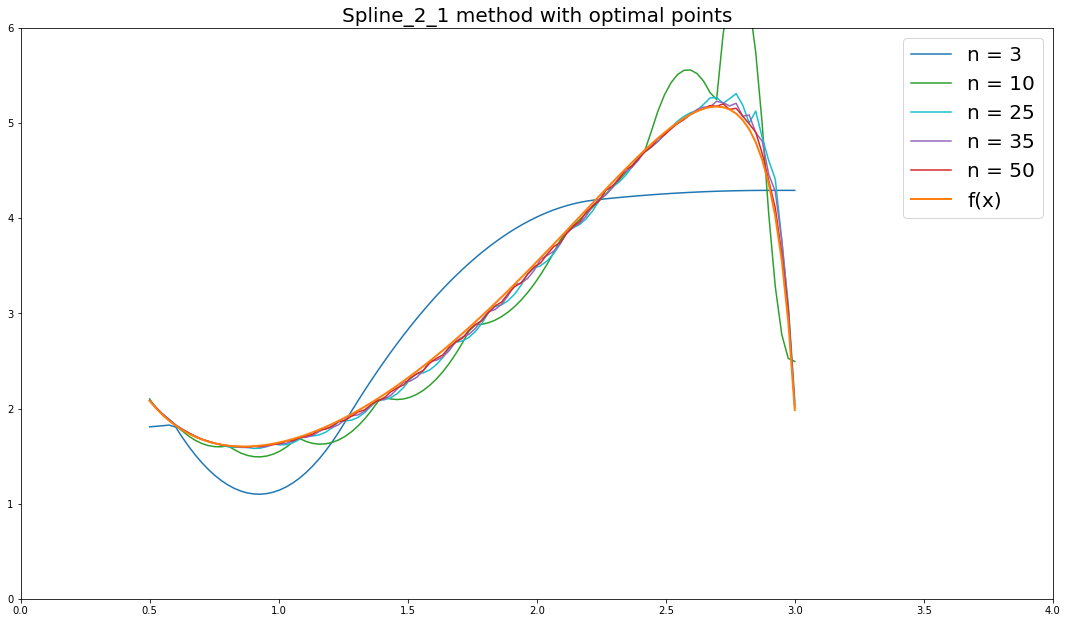

In [6]:
a = 0.5
b = 3
show_superposition(a, b, 'Spline_2_1', optimal=True)

In [10]:
a = 0.5
b = 3
n = 50
table_of_errors(n, a, b, 'Spline_1_0', ratio=100)

Error table for Spline_1_0 method
n: 4, k: 400, R_n: 2.21244625, Ropt_n: 0.92543656
n: 5, k: 500, R_n: 1.92989874, Ropt_n: 0.83342834
n: 6, k: 600, R_n: 1.70071867, Ropt_n: 0.71021034
n: 7, k: 700, R_n: 1.51182021, Ropt_n: 0.58803415
n: 8, k: 800, R_n: 1.35426539, Ropt_n: 0.47990373
n: 9, k: 900, R_n: 1.22117339, Ropt_n: 0.38915663
n: 10, k: 1000, R_n: 1.10761981, Ropt_n: 0.31500197
n: 11, k: 1100, R_n: 1.00976779, Ropt_n: 0.25553292
n: 12, k: 1200, R_n: 0.92468388, Ropt_n: 0.20797191
n: 13, k: 1300, R_n: 0.8502553, Ropt_n: 0.19054656
n: 14, k: 1400, R_n: 0.78472638, Ropt_n: 0.17519433
n: 15, k: 1500, R_n: 0.72664985, Ropt_n: 0.15983099
n: 16, k: 1600, R_n: 0.67494396, Ropt_n: 0.14505065
n: 17, k: 1700, R_n: 0.62870466, Ropt_n: 0.13112123
n: 18, k: 1800, R_n: 0.58708609, Ropt_n: 0.11818118
n: 19, k: 1900, R_n: 0.5496149, Ropt_n: 0.10631486
n: 20, k: 2000, R_n: 0.51565935, Ropt_n: 0.09556426
n: 21, k: 2100, R_n: 0.48477166, Ropt_n: 0.08588666
n: 22, k: 2200, R_n: 0.45663585, Ropt_n: 0.0

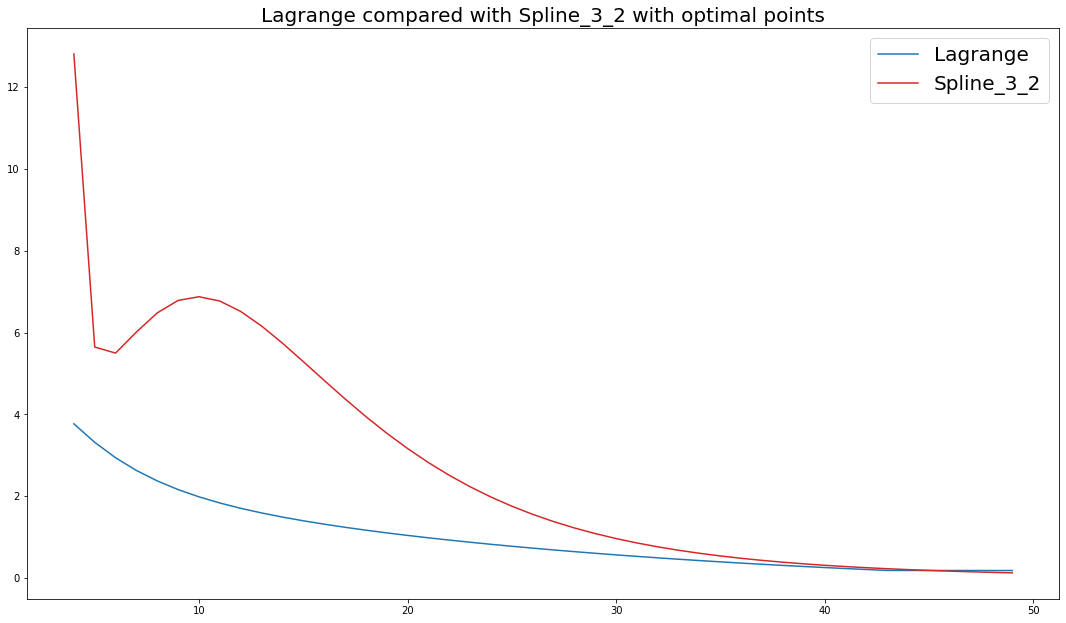

In [11]:
a = 0.5
b = 3
n = 50
func1 = 'Lagrange'
func2 = 'Spline_3_2'
optimal = True
ratio = 100
compare(n, a, b, func1, func2, ratio, optimal)